In [1]:
from __future__ import print_function, division, absolute_import

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn import datasets

from IPython.display import Image



%matplotlib inline

In [2]:
pd.set_option('display.max_row',None)

========================================================================================================================

**Problem Statement. You are retailer and have transactions made by customers. Now, you want to find what set of customer buy what type of items i.e. find group of similar purchasing customers. 
Note:: In this case we do not have any label about similar customers**

** Problem which involves finding pattern in un-labled dataset is called unsupervised learning**

How do we find similar customers/ people. Lets take a real life example-
- People living in Tamil Nadu would be more similar than the people living in Northern part of India - similarity on the basis of language and culture
- You would be more similar to your colleauge or neighbour than people who are living far away from you -similarity on the basis of standard of living or nature of job

So, similairty is defined with respect to refrence and distance




*Lets understand the problem and it's various challanges using few examples *

In [3]:
## lets create some data in which we cam find the pattern visually
np.random.seed(10)
x1 = np.random.normal(2, 1, 100)
y1 = x1 + np.random.normal(0,1,len(x1))
x2 = np.random.normal(10,1,100)
y2 = x2 + np.random.normal(0,1,len(x2))

x = np.concatenate((x1,x2), axis=0)
y = np.concatenate((y1,y2), axis=0)
simple_data = pd.DataFrame({'x':x, 'y':y})

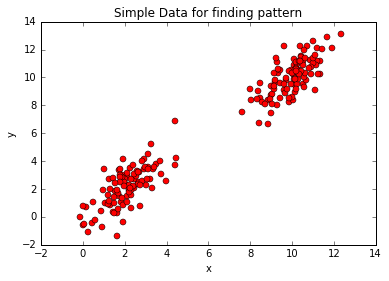

In [4]:
plt.plot(simple_data['x'],simple_data['y'], 'ro')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Simple Data for finding pattern")
plt.show()


- We can clearly see all items in upper lobe would be similar to each other than to the items in lower lobe
- Since, this is a simple data we can easily create group of similar items using using simple rules like -
    $$if\hspace{2mm} x\hspace{2mm} <=\hspace{2mm} 6\hspace{2mm} and\hspace{2mm} y\hspace{2mm} <=\hspace{2mm} 8\hspace{2mm} then\hspace{2mm} group1\hspace{2mm} else\hspace{2mm} group2$$

In [128]:
## Separating two groups using above defined rules

group1 = simple_data[(x <=6) & (y <=8)]
group2 = simple_data[~((x <=6) & (y <=8))]

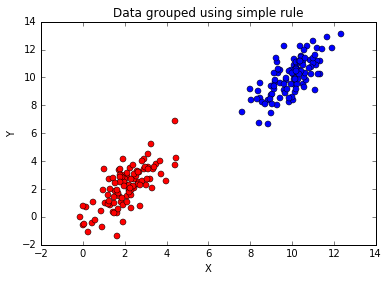

In [134]:
plt.plot(group1['x'], group1['y'], 'ro',
         group2['x'], group2['y'], 'bo')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data grouped using simple rule')

- Most of the business data is neither 2D nor have very recognisable separation between the groups

*Lets look at an example of complex data*

- Above data was very simple 2-dimensional data which we can visually assess and conclude that 2 clusters are all we need to create groups
- Lets create a more complex 2-dimensional data and see if we can visually group it

In [132]:
## Now lets try to find grouping in a complex 2-dimensional data
np.random.seed(8486)
x_complex = np.concatenate((np.random.normal(1,3,500),
                           np.random.gamma(1.5,3,500),
                           np.random.gumbel(2,3,500),
                           np.random.gumbel(2.5,3,500),
                           np.random.gamma(3.5,3,500),
                           np.random.gamma(4,3,500),
                           np.random.normal(4.5,3,500)), axis=0)
y_complex = x_complex + np.random.normal(0,10,len(x_complex))

complex_data = np.stack((x_complex,y_complex), axis=1)

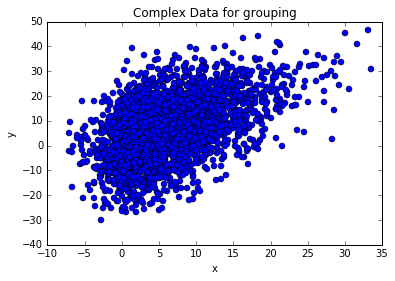

In [135]:
plt.plot(x_complex, y_complex, 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Complex Data for grouping")

- We can clearly see that it is difficult to -
    - create rule based group from above data
    - assess how many groups to create


**One method for creating groups could be-**
    - Decide upon the number of groups, let's say 2 groups
        Step 1: Randomly select two data points or randomly initialize two data points and call them the center of two groups
        Step 2: Calculate distance of all points from the two center
        Step 3: Assign data to the cluster to which it is closest
        Step 4: Re-calculate the centers, and repeat step 2 to 4, for fixed number of iterations or till there is no change  in the centers
**Above method of finding similar data points/ groups is called k-means **

In [151]:
def visualize_k_means(data, 
                      num_cluster,
                      num_iterations, 
                      initial_center, 
                      tolerance = 0.0001):
    """ Function to visulaize k-means algorithm on 2 dimensional data
        data:: 2 dimensional data
        num_cluster:: number of cluster to be created
        num_iterations:: number of iterations to be performed before k-means terminate
        initial_center:: initial group center as given by the user, we can use intelligent way of getting starting centers but
        that has not been implemented
        tolerance:: k-means terminate when maximum change in center is less than the tolerance value, default is 0.0001
    """
    ## Performing basic checks on the argument
    
    # 1. Data is 2-D
    if data.shape[1] != 2:
        raise ValueError("Data should be two dimensional")
        
    # 2. number of rows in initial_center should be equal to num_clusters    
    if num_cluster != initial_center.shape[0]:
        raise ValueError("Number of clusters and number of initialized centers does not match")
    
    # 3. number of columns in initial_center should be 2
    if initial_center.shape[1] != 2:
        raise ValueError("Centers must be 2-D")        
    
    ## Implementing k-means algorithm
    for ni in range(num_iterations):
        dist_matrix = np.zeros((num_cluster,complex_data.shape[0]))
        
        ## Step2:: Calculating distance of all points from all centers
        for i in range(num_cluster):
            dist_matrix[i] = np.sqrt(np.sum((initial_center[i] - complex_data)*(initial_center[i] - complex_data),axis=1))
        
        ## Step 3:: Getting groupings for all data points
        labels = np.argmin(dist_matrix, axis=0)
        
        ## Step 4:: Calculating new centers
        new_center = np.zeros((num_cluster, complex_data.shape[1]))
        for i in range(num_cluster):
            new_center[i] = np.mean(data[labels==i], axis=0)
            
            ## plotting the grouping results for each iteration
            plt.plot(data[labels == i,0], data[labels == i,1], 'o')
        lines = plt.plot(initial_center[:,0], initial_center[:,1], 'kx',
                            initial_center[:,0], initial_center[:,1], 'b-')
        plt.setp(lines, ms = 15.0)
        plt.setp(lines, mew = 2.0)
        plt.title("Clusters after "+ str(ni) + " iterations" )
        plt.show()
        print("Centers after ", str(ni), "iterations are:: ",[new_center[i] for i in range(num_cluster) ])
        change_in_center = np.abs(new_center - initial_center)
        if np.max(change_in_center) < tolerance:
            print("Converging after ", str(ni+1), "iterations")
            break            
        initial_center = new_center
        time.sleep(1)
    return new_center
        
        

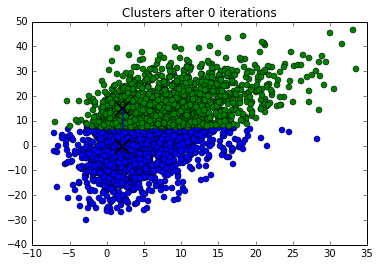

Centers after  0 iterations are::  [array([ 3.99119135, -2.05221284]), array([  8.13391316,  16.53780049])]


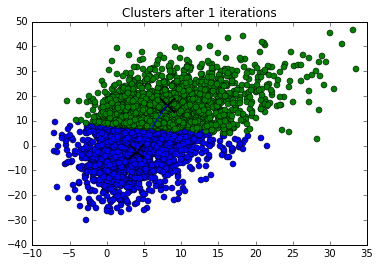

Centers after  1 iterations are::  [array([ 3.68434694, -2.05752175]), array([  8.496833  ,  16.44874709])]


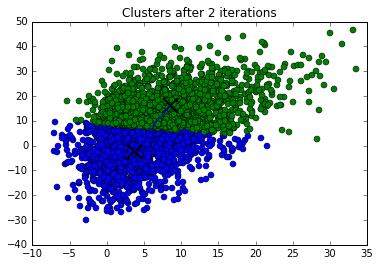

Centers after  2 iterations are::  [array([ 3.66679487, -2.05318852]), array([  8.51881263,  16.4433208 ])]


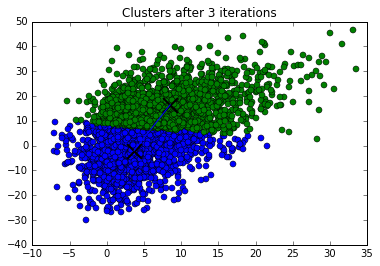

Centers after  3 iterations are::  [array([ 3.66679487, -2.05318852]), array([  8.51881263,  16.4433208 ])]
Converging after  4 iterations


In [152]:
# Creating two clusters
two_centers = np.array([[2,0],
                       [2,15]])
two_centers_final = visualize_k_means(complex_data, 2, 100, two_centers)

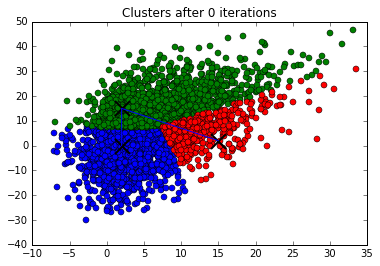

Centers after  0 iterations are::  [array([ 2.82044687, -2.70540495]), array([  7.23040418,  17.08539456]), array([ 13.18061589,   6.15953163])]


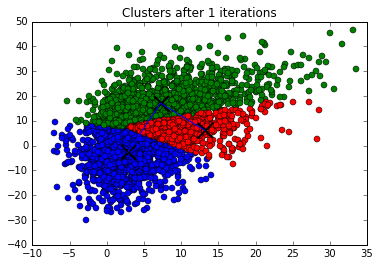

Centers after  1 iterations are::  [array([ 2.69347927, -3.301526  ]), array([  7.66717604,  17.95232685]), array([ 10.30534178,   6.63912569])]


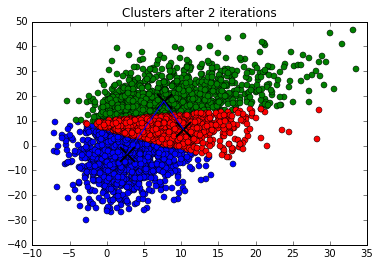

Centers after  2 iterations are::  [array([ 2.57298387, -4.58535594]), array([  8.51014991,  19.43305819]), array([ 7.46043322,  6.86918981])]


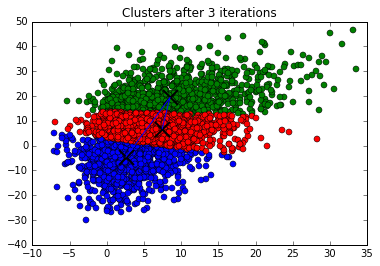

Centers after  3 iterations are::  [array([ 2.69603871, -6.02585691]), array([  9.6690266 ,  20.61263156]), array([ 5.92951338,  6.9606711 ])]


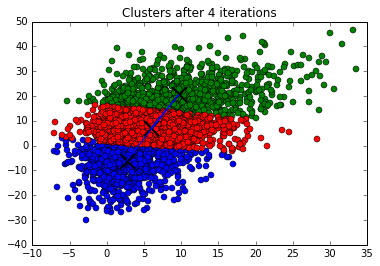

Centers after  4 iterations are::  [array([ 2.79892116, -6.84486481]), array([ 10.40885226,  21.16814835]), array([ 5.40231196,  6.96817519])]


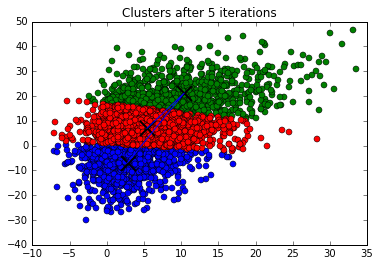

Centers after  5 iterations are::  [array([ 2.854283  , -7.18628322]), array([ 10.77270596,  21.43696201]), array([ 5.23150174,  7.00089305])]


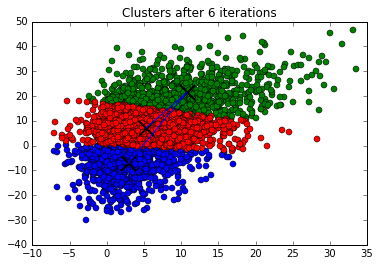

Centers after  6 iterations are::  [array([ 2.86072553, -7.27354777]), array([ 10.86113342,  21.48687922]), array([ 5.19382642,  6.99761281])]


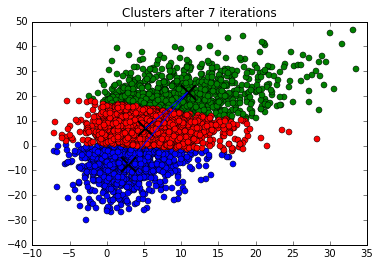

Centers after  7 iterations are::  [array([ 2.85891818, -7.28042134]), array([ 10.91348736,  21.51844054]), array([ 5.18522145,  7.02150403])]


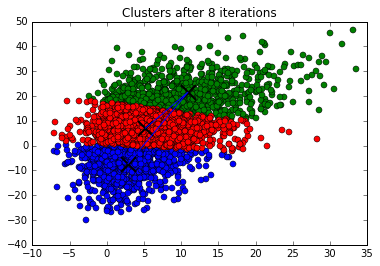

Centers after  8 iterations are::  [array([ 2.85891818, -7.28042134]), array([ 10.93402028,  21.53123912]), array([ 5.18219271,  7.03271735])]


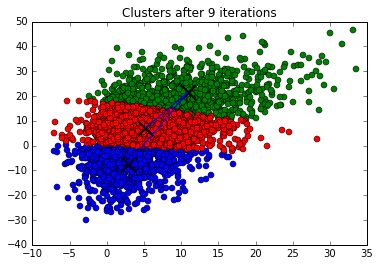

Centers after  9 iterations are::  [array([ 2.85891818, -7.28042134]), array([ 10.94437434,  21.54807143]), array([ 5.1841087 ,  7.04199731])]


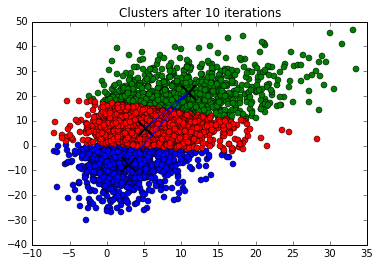

Centers after  10 iterations are::  [array([ 2.85891818, -7.28042134]), array([ 10.94853292,  21.55690605]), array([ 5.18556247,  7.04644348])]


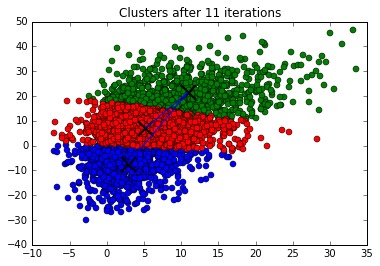

Centers after  11 iterations are::  [array([ 2.85891818, -7.28042134]), array([ 10.94853292,  21.55690605]), array([ 5.18556247,  7.04644348])]
Converging after  12 iterations


In [153]:
## Creating three clusters
three_centers = np.array([[2,0],
                          [2,15],
                          [15,2]])
three_centers_final = visualize_k_means(complex_data, 3, 100, three_centers )

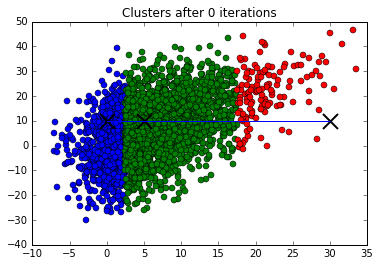

Centers after  0 iterations are::  [array([ 0.31935812,  0.64710745]), array([ 7.34702039,  7.7003168 ]), array([ 21.60651939,  21.77046787])]


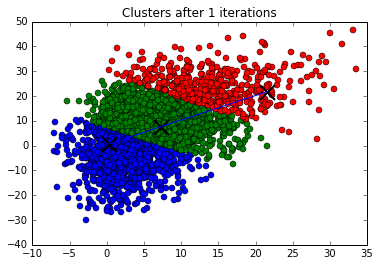

Centers after  1 iterations are::  [array([ 2.43763972, -4.18207895]), array([  6.50330667,  10.4019485 ]), array([ 14.38524236,  24.5534894 ])]


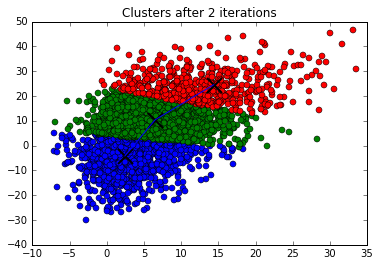

Centers after  2 iterations are::  [array([ 3.12100849, -4.9639624 ]), array([  5.8978632 ,  10.01888335]), array([ 12.98094898,  24.45178183])]


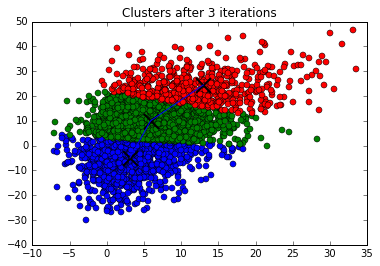

Centers after  3 iterations are::  [array([ 3.16503837, -5.32048725]), array([ 5.7280543 ,  9.58096102]), array([ 12.59434389,  24.05377318])]


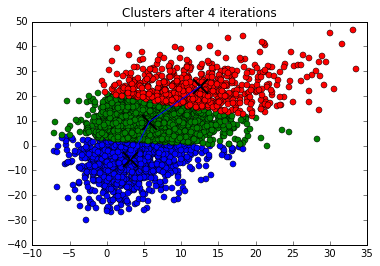

Centers after  4 iterations are::  [array([ 3.12711952, -5.60870975]), array([ 5.62102729,  9.22727778]), array([ 12.40035647,  23.68246425])]


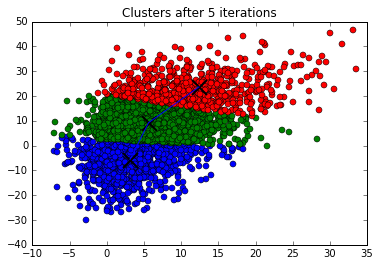

Centers after  5 iterations are::  [array([ 3.11267159, -5.81153774]), array([ 5.55949948,  8.94101653]), array([ 12.14724447,  23.40137372])]


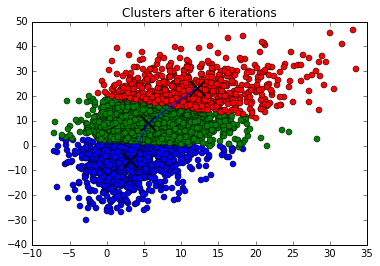

Centers after  6 iterations are::  [array([ 3.08995323, -6.0231547 ]), array([ 5.49577752,  8.6779979 ]), array([ 11.97490221,  23.15319992])]


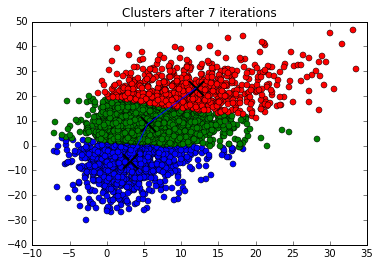

Centers after  7 iterations are::  [array([ 3.04044822, -6.22888175]), array([ 5.46533553,  8.40254348]), array([ 11.76294217,  22.90828104])]


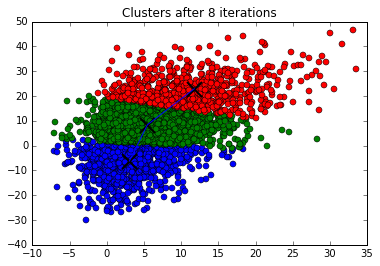

Centers after  8 iterations are::  [array([ 3.02767054, -6.4178275 ]), array([ 5.38896018,  8.19802589]), array([ 11.69224078,  22.70062851])]


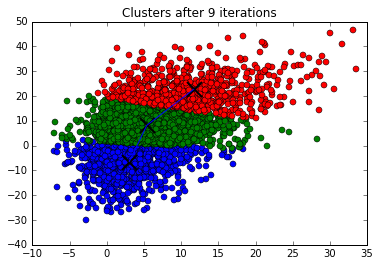

Centers after  9 iterations are::  [array([ 3.03108582, -6.57293721]), array([ 5.3161257 ,  8.03545488]), array([ 11.63880767,  22.52693793])]


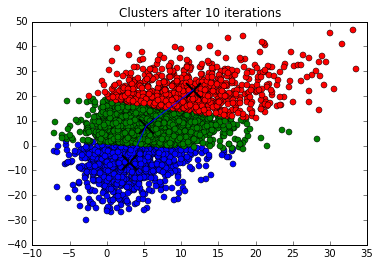

Centers after  10 iterations are::  [array([ 3.01503729, -6.70649752]), array([ 5.27277663,  7.84698446]), array([ 11.50619901,  22.32095844])]


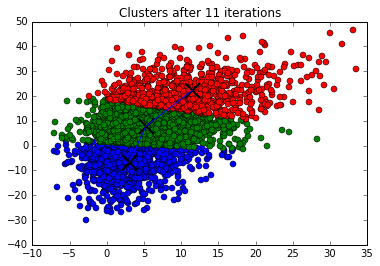

Centers after  11 iterations are::  [array([ 2.97977512, -6.85304848]), array([ 5.24803653,  7.61854016]), array([ 11.31898908,  22.09147824])]


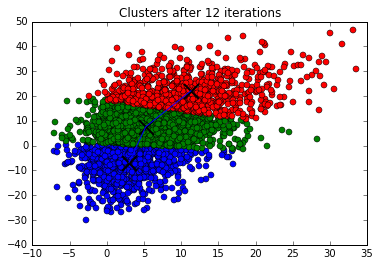

Centers after  12 iterations are::  [array([ 2.94767108, -7.01004499]), array([ 5.22276296,  7.45426555]), array([ 11.23864782,  21.96938509])]


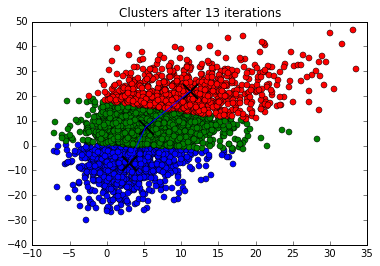

Centers after  13 iterations are::  [array([ 2.92416955, -7.09863889]), array([ 5.21633169,  7.34317146]), array([ 11.15982813,  21.88108165])]


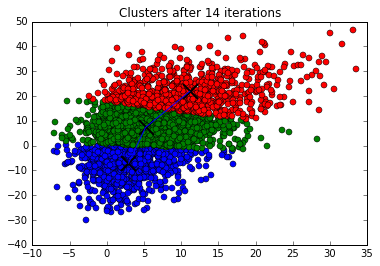

Centers after  14 iterations are::  [array([ 2.93132567, -7.15663247]), array([ 5.20055644,  7.27518085]), array([ 11.1067314 ,  21.82633829])]


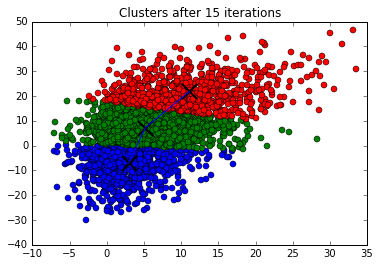

Centers after  15 iterations are::  [array([ 2.92358586, -7.17677858]), array([ 5.19477106,  7.23930541]), array([ 11.08281786,  21.78154853])]


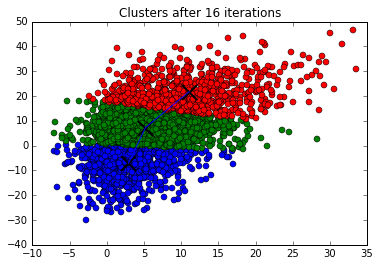

Centers after  16 iterations are::  [array([ 2.92081544, -7.18343129]), array([ 5.19630868,  7.22427631]), array([ 11.06513326,  21.7669888 ])]


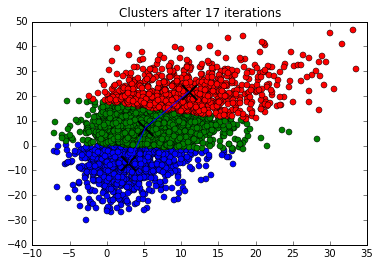

Centers after  17 iterations are::  [array([ 2.91650983, -7.18983908]), array([ 5.19706685,  7.21486176]), array([ 11.05879447,  21.75868924])]


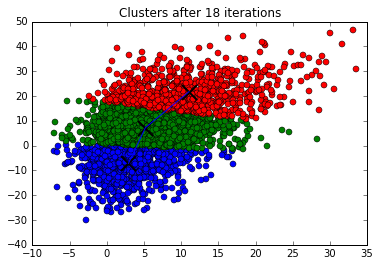

Centers after  18 iterations are::  [array([ 2.908659  , -7.19569393]), array([ 5.200572  ,  7.20991839]), array([ 11.05879447,  21.75868924])]


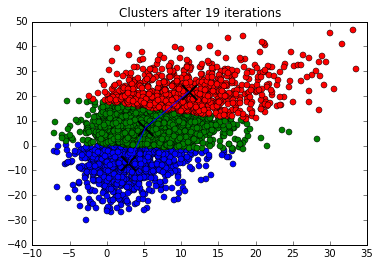

Centers after  19 iterations are::  [array([ 2.90871757, -7.2028053 ]), array([ 5.19917317,  7.20575086]), array([ 11.05879447,  21.75868924])]


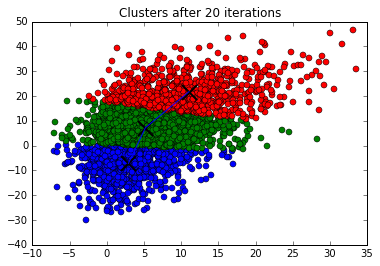

Centers after  20 iterations are::  [array([ 2.90871757, -7.2028053 ]), array([ 5.19632631,  7.20186564]), array([ 11.0574157 ,  21.74839155])]


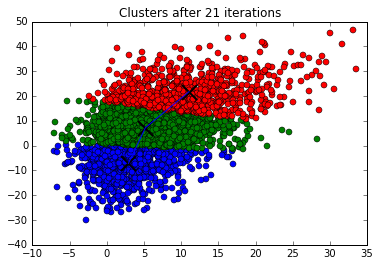

Centers after  21 iterations are::  [array([ 2.90871757, -7.2028053 ]), array([ 5.19632631,  7.20186564]), array([ 11.0574157 ,  21.74839155])]
Converging after  22 iterations


In [154]:
## Three clusters with different initialization
three_centers_diff = np.array([[0,10],
                             [5,10],
                             [30,10]])
three_centers_diff_final = visualize_k_means(complex_data,3,100, three_centers_diff)

In [155]:
print("Centers of three cluster with first initialization:: ", three_centers_final)
print("Centers of three cluster with second initialization:: ", three_centers_diff_final)

Centers of three cluster with first initialization::  [[  2.85891818  -7.28042134]
 [ 10.94853292  21.55690605]
 [  5.18556247   7.04644348]]
Centers of three cluster with second initialization::  [[  2.90871757  -7.2028053 ]
 [  5.19632631   7.20186564]
 [ 11.0574157   21.74839155]]


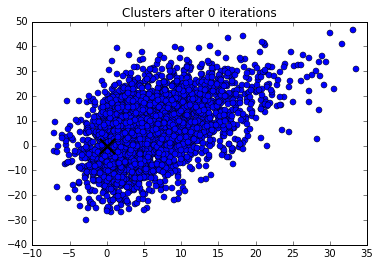

Centers after  0 iterations are::  [array([ 5.82109075,  6.15926162]), array([ nan,  nan]), array([ nan,  nan])]


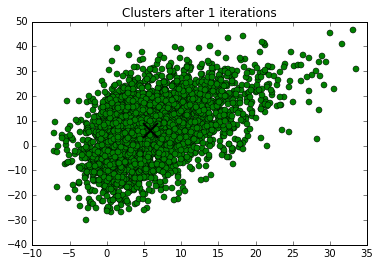

Centers after  1 iterations are::  [array([ nan,  nan]), array([ 5.82109075,  6.15926162]), array([ nan,  nan])]


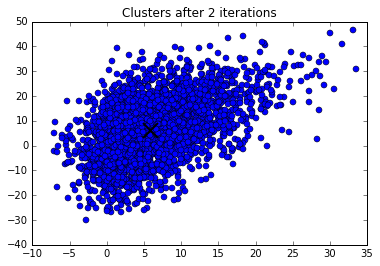

Centers after  2 iterations are::  [array([ 5.82109075,  6.15926162]), array([ nan,  nan]), array([ nan,  nan])]


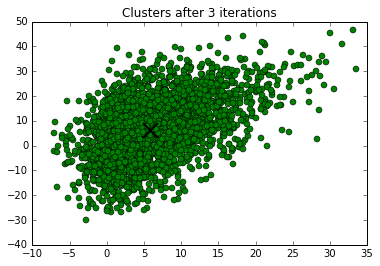

Centers after  3 iterations are::  [array([ nan,  nan]), array([ 5.82109075,  6.15926162]), array([ nan,  nan])]


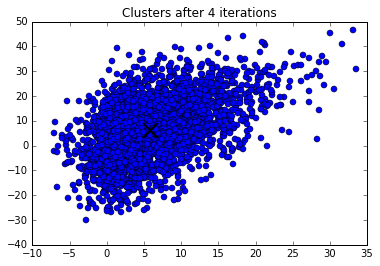

Centers after  4 iterations are::  [array([ 5.82109075,  6.15926162]), array([ nan,  nan]), array([ nan,  nan])]


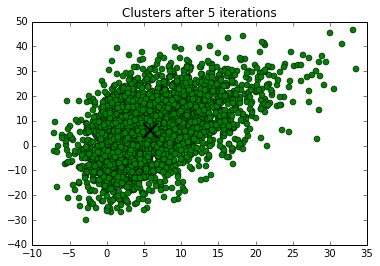

Centers after  5 iterations are::  [array([ nan,  nan]), array([ 5.82109075,  6.15926162]), array([ nan,  nan])]


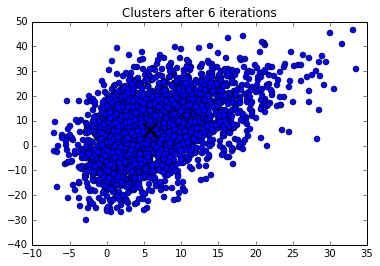

Centers after  6 iterations are::  [array([ 5.82109075,  6.15926162]), array([ nan,  nan]), array([ nan,  nan])]


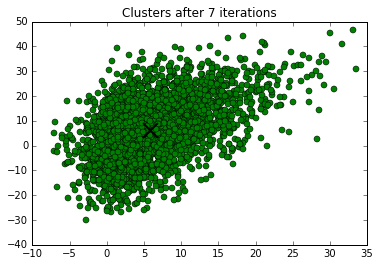

Centers after  7 iterations are::  [array([ nan,  nan]), array([ 5.82109075,  6.15926162]), array([ nan,  nan])]


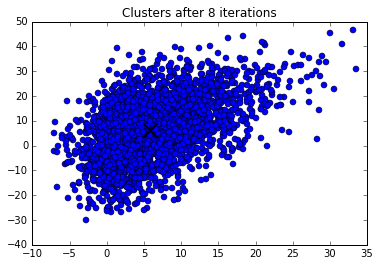

Centers after  8 iterations are::  [array([ 5.82109075,  6.15926162]), array([ nan,  nan]), array([ nan,  nan])]


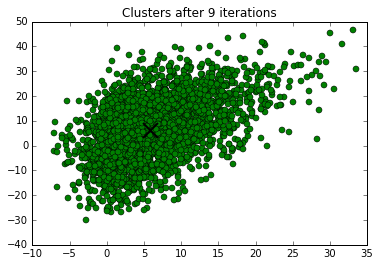

Centers after  9 iterations are::  [array([ nan,  nan]), array([ 5.82109075,  6.15926162]), array([ nan,  nan])]


In [157]:
## Three clusters with the same center
three_centers_sames =np.array([[0,0],
                              [0,0],
                              [0,0]])
three_centers_sames_final = visualize_k_means(complex_data, 3, 10, three_centers_sames)

- From above examples we can conclude
    - convergance of k-means depends upon the initial centers
    - it may not converge to same centers, k-means is prone to local minima
    - if initial centers are same then it might never converge for naive implementation and we might never get the desired number of clusters
    
    
**So, it is important to define initial centers intelligently -** 
    - choosing centers randomly from the data, or
    - initialize randomly while making sure no two centers are same or use intelligent methods to resolve same center  scenario
    - choose centers which are distant from each other
   
**To avoid local optima, try with different initial centers**

** All of above can be performed using KMeans() from sci-kit learn package of python, demo below**
    

- How many clusters ?
- Lets try to create 2, 3 and 4 clusters on this data and check if we can assess the quality visually

In [194]:
def plot_cluster(data,num_cluster, labels):
    for i in range(num_cluster):
        plt.plot(data[labels==i,0], data[labels==i, 1], 'o')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(str(num_cluster)+ " Clusters")

In [189]:
np.unique(kmeans_3.labels_)

array([0, 1, 2])

In [197]:
## 2 cluster
# lets use k-means to find the cluster
kmeans_2 = KMeans(n_clusters=2, init=np.array([[0,0], [0,0]]), n_init=1, max_iter=300,  random_state=10)
kmeans_2.fit(complex_data)



# ## 3 cluster
# # lets use k-means to find the cluster
kmeans_3 = KMeans(n_clusters=3, init=np.array([[0,0],[0,0],[0,0]]), n_init=10, max_iter=300,  random_state=10)
kmeans_3.fit(np.column_stack((x_complex,y_complex)))

# ## 4 cluster
# # lets use k-means to find the cluster
kmeans_4 = KMeans(n_clusters=4, init=np.array([[0,0],[0,0],[0,0], [0,0]]), n_init=10, max_iter=300,  random_state=10)
kmeans_4.fit(np.column_stack((x_complex,y_complex)))


print("Centers of three clusters using naive method ", three_centers_diff_final)
print("Centers of three clusters using kmeans from sci-kit learn ", kmeans_3.cluster_centers_)

Centers of three clusters using naive method  [[  2.90871757  -7.2028053 ]
 [  5.19632631   7.20186564]
 [ 11.0574157   21.74839155]]
Centers of three clusters using kmeans from sci-kit learn  [[  2.92358586  -7.17677858]
 [ 11.08281786  21.78154853]
 [  5.19477106   7.23930541]]


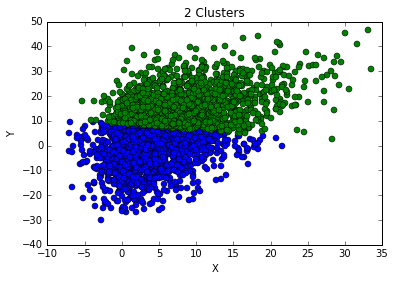

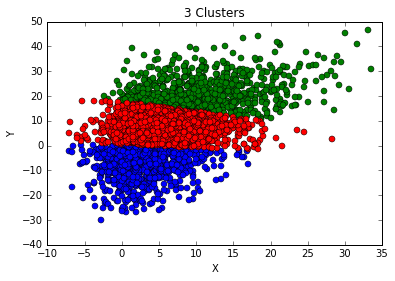

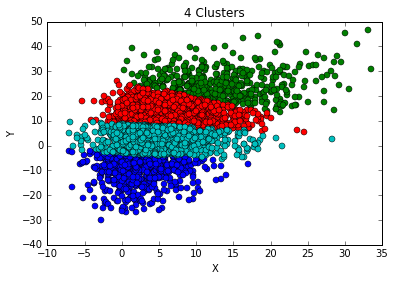

In [195]:
plt.figure(1)
plt.subplot(111)
plot_cluster(complex_data, 2, kmeans_2.labels_)


plt.figure(2)
plt.subplot(111)
plot_cluster(complex_data, 3, kmeans_3.labels_)


plt.figure(3)
plt.subplot(111)
plot_cluster(complex_data, 4, kmeans_4.labels_)


- What is the optimal number of clusters
    - Not easy to assess visually
    - We will have to use some mathematical measure to assess it, like -
        - Within Sum of Square - closness of points within the cluster
        - Silhouette - how well points from different clusters are separated
        - Average Z-score of attributes - How cluster is different from average data
        - Size of each cluster 
    - Use business knowledge to determine the number of clusters




Now, lets look at the data which is does not vary much along each dimension

In [14]:
np.random.seed(100)
x_varying = np.concatenate((np.random.normal(1,3,500),
                           np.random.gamma(1.5,3,500),
                           np.random.gumbel(2,3,500),
                           np.random.gumbel(2.5,3,500),
                           np.random.gamma(3.5,3,500),
                           np.random.gamma(4,3,500),
                           np.random.normal(4.5,3,500)), axis=0)
y_varying = np.random.normal(0,1,len(x_varying))

varying_data = np.stack((x_varying,y_varying), axis=1) 

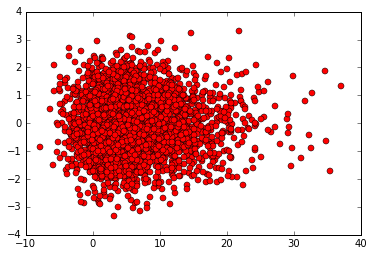

In [15]:
plt.plot(varying_data[:,0], varying_data[:,1], 'ro')

(-7.9199464221526572, 37.023351656782751)

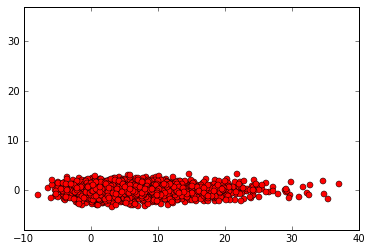

In [16]:
plt.plot(varying_data[:,0], varying_data[:,1], 'ro')
plt.ylim(min(varying_data[:,0]), max(varying_data[:,0]))

- We can see there is not much variance along y
- So would it be useful to use y for getting grouping 
    - NO, because almost all data points have similar y

** So it is important to choose which features to use, mostly use those features which varies a lot**
- if there are 2 features we can do it easily, what if there are 1000's of feature which do we keep and which do we ignore
- Best way to assess it would be that we create grouping using all possible combinations of features and analyse the result
    - In case there are 1000 features, possible number of experiments would be $2^{100}$
        - Performing these many experiments will probably take more time then the age of earth, let alone analysing the results
    -We can remove some features using **business knowledge** 
- So, we need to come-up with methods which makes this process easier and works across varied set of data - A research topic for everyone

Conclusion:

- Difficult to assess the number of clusters in the data
- Difficult to conclude which all features of the data should be used
- Difficult to assess the quality of cluster as we do not have any label against which we can compare => Unsupervised learning

** Unsupervised learning is much more difficult to do then supervised learning**

## AI will over take humanity when we have made unsupervised learning as easy as supervised learning

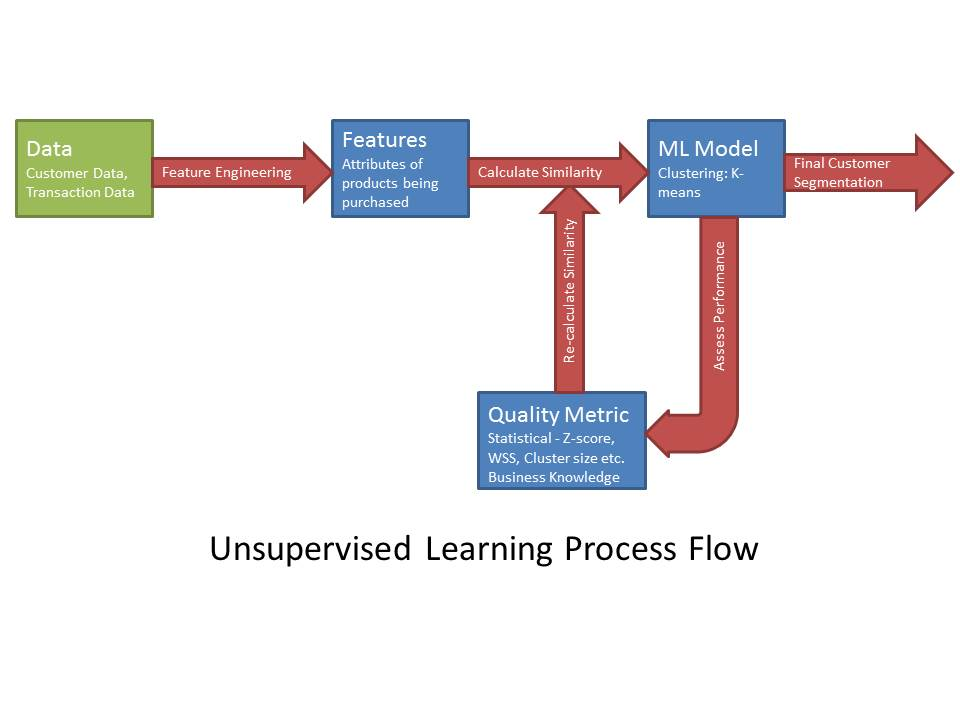

In [213]:
Image('data/UnsupervisedLearning.JPG')

=============================================================

## Next present brown shoe results in presentation - 